# Basics of Tensor

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [5]:
P = torch.Tensor([[1, 2, 3], [4, 5, 6]])
P

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
# Some tensor info
print('Tensor shape:', P.shape)   # t.size() gives the same
print('Number of dimensions:', P.dim())
print('Tensor type:', P.type())   # there are other types

Tensor shape: torch.Size([2, 3])
Number of dimensions: 2
Tensor type: torch.FloatTensor


In [8]:
# Transpose
Q = P.t()
Q

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [9]:
# Transpose (via permute)
R = P.permute(-1,0)
R

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [10]:
P2 = torch.randn(3,5)
P3 =P2.add(1)
P3

tensor([[ 1.2849,  1.5534,  0.1180,  0.3938,  2.2763],
        [ 1.6502,  0.1412,  0.3896,  0.5403,  0.4647],
        [ 2.2402,  1.7677,  0.5541,  0.2003, -0.9709]])

## Numpy ndarray <--> PyTorch tensor

In [11]:
import numpy as np

# ndarray to tensor
a = np.random.randn(3, 5)
t = torch.from_numpy(a)
print(a)
print(t)
print(type(a))
print(type(t))

[[ 1.19855257 -0.0948544  -0.05289239  1.19056551  0.66530245]
 [-0.51037258 -0.55389359 -0.30727349  1.7033189   0.75926486]
 [ 1.33908337  1.8154377  -0.95953474  0.50762096  0.67804895]]
tensor([[ 1.1986, -0.0949, -0.0529,  1.1906,  0.6653],
        [-0.5104, -0.5539, -0.3073,  1.7033,  0.7593],
        [ 1.3391,  1.8154, -0.9595,  0.5076,  0.6780]], dtype=torch.float64)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [12]:
# tensor to ndarray
t = torch.randn(3, 5)
a = t.numpy()
print(t)
print(a)
print(type(t))
print(type(a))

tensor([[ 0.1471,  0.5169, -0.5098, -0.1719,  0.5571],
        [ 1.2408, -0.0139,  1.2651,  0.7528,  0.4716],
        [ 0.0930,  0.1702,  1.5497, -0.4681,  0.8842]])
[[ 0.14714453  0.5169068  -0.5098037  -0.17189264  0.5570847 ]
 [ 1.2408271  -0.01388017  1.2650899   0.75279814  0.47162578]
 [ 0.09302246  0.17018093  1.549681   -0.46809167  0.8842021 ]]
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


## Operators as Method

In [ ]:
print("Sum ={}".format(t.sum()))
print("Prod ={}".format(t.prod()))
print("Mean ={}".format(t.mean()))
print("Std ={}".format(t.std()))

In [ ]:
# Compute cross product
t1 = torch.randn(4, 3)
t2 = torch.randn(4, 3)
t1.cross(t2)

### Inplace operation 

In [ ]:
A = torch.randn(4,3)
A

In [ ]:
A.add_(1)
A

## Index and Slicing

In [13]:
# Slicing
t = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Every row, only the last column
t[:, -1]

tensor([3., 6., 9.])

In [14]:
# Lower right most corner
print(t[-1:, -1:])

tensor([[9.]])


In [15]:
# First 2 rows, all columns
t[:2, :]

tensor([[1., 2., 3.],
        [4., 5., 6.]])

# Computation Graph

In [ ]:
a = torch.ones(2, 2, requires_grad=True)
b = a * a * 3
out = b.mean()
print('a ={}'.format(a))
print('out ={}'.format(out))
print('a.requires_grad ={}'.format(a.requires_grad))
print('b.requires_grad ={}'.format(b.requires_grad))
print('out.requires_grad ={}'.format(out.requires_grad))

In [ ]:
out.backward()

In [ ]:
out.backward()

# Variable 

In [ ]:
from torch.autograd import Variable
x = Variable(torch.rand(2,3).float(), requires_grad=True)
y = x +1
z = Variable(torch.rand(2,3).float(), requires_grad=False)

In [ ]:
x

In [ ]:
y

In [ ]:
z

In [ ]:
y.grad_fn

In [ ]:
x.grad_fn

In [ ]:
y=y.sigmoid()

In [ ]:
y.grad_fn

In [ ]:
y.grad_fn.next_function

## In-Place

In [ ]:
g= x.tanh()
g

In [ ]:
g.add_(3)
g

## Aliasing

In [ ]:
h = Variable(torch.randn(2,3),requires_grad = False)
h

In [ ]:
i =h.t_()
i

## Debugging Pytorch


# Autograd

In [ ]:
from torch import autograd
D = torch.ones(1)
D

In [ ]:
D.requires_grad

In [ ]:
E = D*2
E

In [ ]:
Sum = D+E
Sum

In [ ]:
Sum.backward()

In [ ]:
D2 = torch.ones(1, requires_grad=True)
Sum2 = D2 +E

In [ ]:
D2.requires_grad 

In [ ]:
Sum2.backward()

In [ ]:
D2.grad

In [ ]:
Sum2.requires_grad 

In [ ]:
with torch.no_grad():
    Sum3 = D2 + E

Sum3.requires_grad 

# Linear Regression

In [16]:
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from plot_error_surfaces import *
# Set the random seed:
torch.manual_seed(1)

In [17]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [18]:
# Create dataset object

dataset = Data()

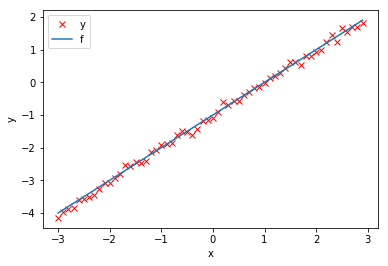

In [19]:
# Plot the data

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [20]:


class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [21]:
criterion = nn.MSELoss()

In [22]:
#create a linear regression object, as our input and output will be two we set the parameters accordingly
model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3636]], requires_grad=True), Parameter containing:
 tensor([0.4957], requires_grad=True)]

In [24]:
# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [25]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

In [26]:
def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist()) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        get_surface.plot_ps()

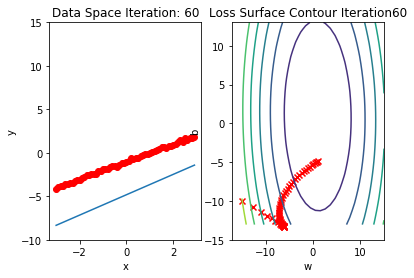

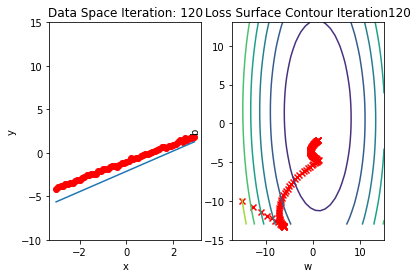

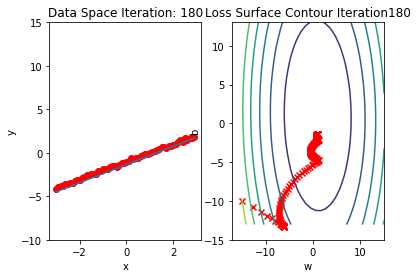

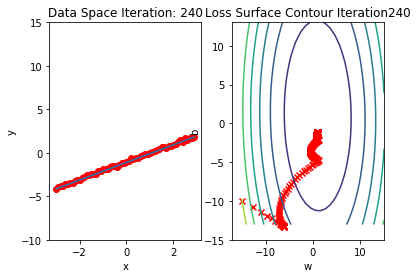

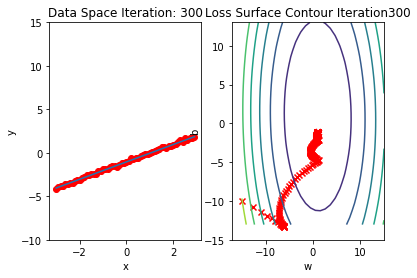

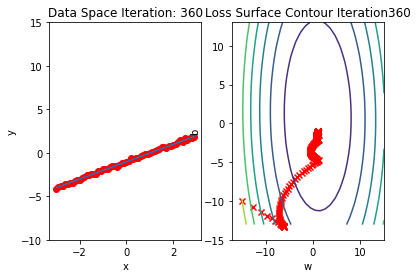

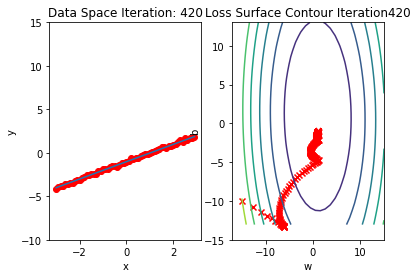

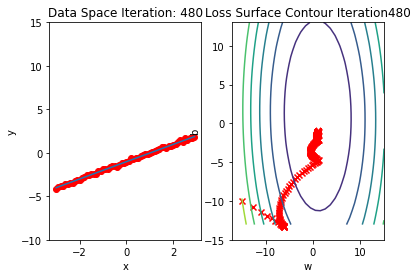

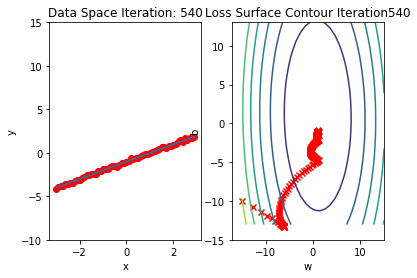

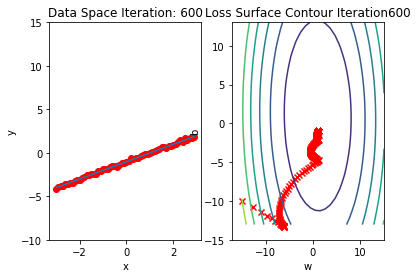

In [27]:
train_model_BGD(10)